# Microdados da Educação Superior

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np

p = 0.01

df = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep="|"
)

df.head()

## Análise de dados de pessoas com deficiência no Ensino Superior

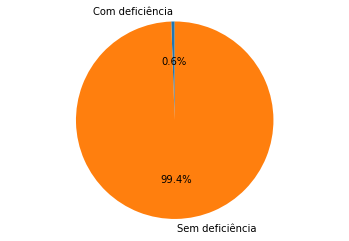

In [ ]:
disabled = df.loc[df['IN_DEFICIENCIA'] == 1].count()[0]
non_disabled = df.loc[df['IN_DEFICIENCIA'] == 0].count()[0]

labels = ['Com deficiência', 'Sem deficiência']
values = [disabled, non_disabled]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

Esse resultado é bastante problemático. A Lei 1527/19 reserva 5% das vagas em universidades para pessoas com deficiência. O resultado que temos aqui é bem diferente do esperado. Esse cenário piora com uma rápida pesquisa nos dados do IBGE: quase 25% da população brasileira tem algum tipo de deficiência. Onde estão essas pessoas? Por que não estão nas universidades? Claramente há uma falha na inclusão de pessoas com deficiência em todos os âmbitos da sociedade, especificamente no ensino superior.

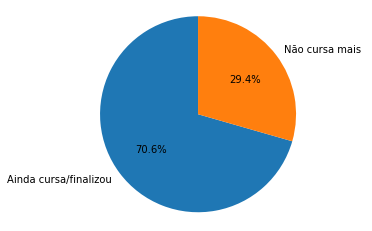

In [ ]:
stds = df.loc[df['IN_DEFICIENCIA'] == 1]

cursando = stds.loc[stds['TP_SITUACAO'] == 2].count()[0]
trancado = stds.loc[stds['TP_SITUACAO'] == 3].count()[0]
desvinculado = stds.loc[stds['TP_SITUACAO'] == 4].count()[0]
transferido = stds.loc[stds['TP_SITUACAO'] == 5].count()[0]
formado = stds.loc[stds['TP_SITUACAO'] == 6].count()[0]
falecido = stds.loc[stds['TP_SITUACAO'] == 7].count()[0]

still = cursando + transferido + formado
not_there = trancado + desvinculado + falecido

labels = ['Ainda cursa/finalizou', 'Não cursa mais']
values = [still, not_there]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

Se falarmos da presença de pessoas com deficiência numa análise mais profunda, esses números pioram: dos 0,6% que de alguma forma ingressaram na faculdade, 29.4% deles não cursam mais. Seja por ter trancado, desvinculado ou falecido.

Isso traz a reflexão: a universidade está pronta para receber pessoas com deficiência?

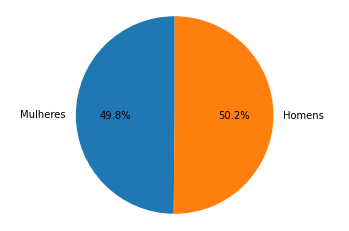

In [ ]:
women = stds.loc[stds['TP_SEXO'] == 1].count()[0]
men = stds.loc[stds['TP_SEXO'] == 2].count()[0]


labels = ['Mulheres', 'Homens']
values = [women, men]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

Em uma breve análise do gênero das pessoas com deficiência que estão no ensino superior, nota-se que há um número bem parecido de ambos gêneros.

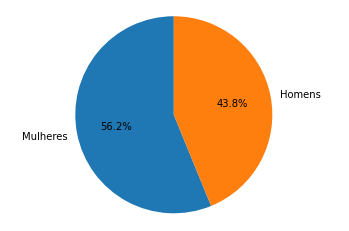

In [ ]:
women = df.loc[df['TP_SEXO'] == 1].count()[0] # Localizando as mulheres no dataframe na coluna TP_SEXO, [0] serve para retornar o valor da tabela
men = df.loc[df['TP_SEXO'] == 2].count()[0]

labels = ['Mulheres', 'Homens']
values = [women, men]

fig1, ax1 = plt.subplots() # Retorna uma tupla(Figure, Axes)

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90) # Formatação do gráfico

ax1.axis('equal') # Deixar a forma redondinha
plt.show()

Porém, quando se analisa o percentual total de homens e mulheres nas universidades, nota-se que há uma análise diferente. 56.2% são mulheres. Ao comparar com o percentual do gênero de pessoas com deficiências, surge uma problemática: 6.4% de diferença de percentual. 

Esse número pode parecer pequeno, porém, quando se trata de muitos dados, é um fator significativo. Por que mulheres com deficiência estão menos presente no ensino superior?

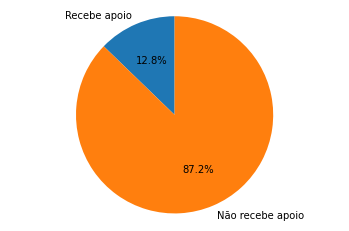

In [ ]:
stds = df.loc[df['IN_DEFICIENCIA'] == 1]

not_recieve = stds.loc[stds['IN_APOIO_SOCIAL'] == 0].count()[0]
recieving = stds.loc[stds['IN_APOIO_SOCIAL'] == 1].count()[0]

labels = ['Recebe apoio', 'Não recebe apoio']
values = [recieving, not_recieve]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

12.8% das pessoas com deficiência recebem algum tipo de apoio das faculdades

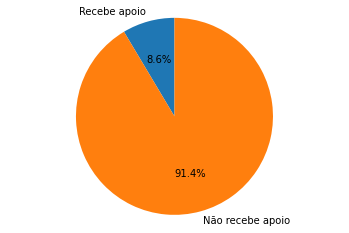

In [ ]:
not_recieve_all = df.loc[df['IN_APOIO_SOCIAL'] == 0].count()[0]
recieving_all = df.loc[df['IN_APOIO_SOCIAL'] == 1].count()[0]

labels = ['Recebe apoio', 'Não recebe apoio']
values = [recieving_all - recieving, not_recieve_all - not_recieve]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.show()

Entre pessoas sem deficiência, o número é menor. Diante disso, percebe-se que as universidades precisam ser um ambiente inclusivo e propício para que pessoas com deficiência tenham as mesmas oportunidades que as que não têm.

### Com esses dados, notamos que a presença de pessoas com deficiência nas universidades é um empecilho no Brasil. Pouca inclusão, problemáticas na análise dos perfis que estão no ensino superior, evasão... 

### É sabido pela sociedade que existem problemas em relação à inclusão de minorias, especificamente de pessoas com deficiência, porém, esses dados escancaram uma realidade muito cruel. Esses dados não são de décadas, centenas de anos atrás. São dados de 2019, atuais. A inclusão de pessoas com deficiência em todos os âmbitos da sociedade é imprescindível, esses dados mostram que o Brasil falhou.